In [33]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

In [34]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [35]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

   Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0          35.560            1.6       8             256       1.60    978  
1          39.624            2.0       4             256       2.20    634  
2          39.624            2.7       8             256       2.20    946  
3          33.782            1.6       8             128       1.22   1244  
4          39.624            1.8       8             256       1.91    837  
Data Shape:
{'Columns': Index(['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS',
       'CPU_core', 'S

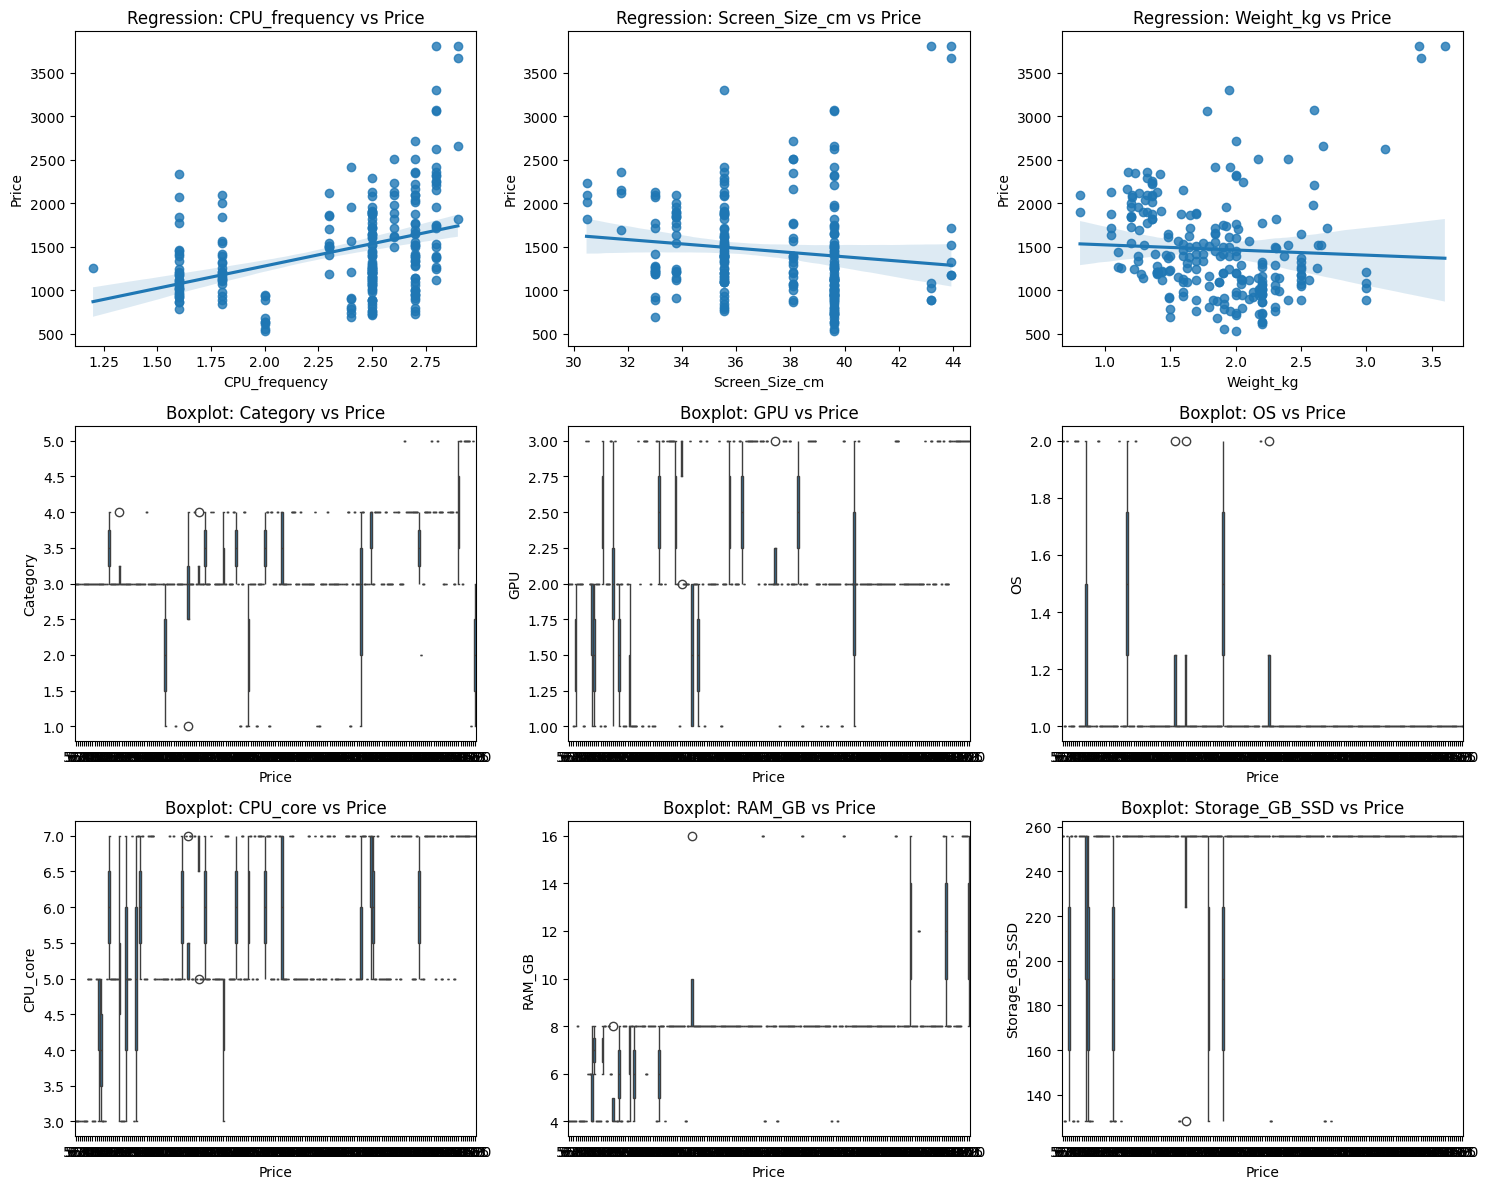

                     Attribute  Correlation Value  Pearson Coefficient  \
Unnamed: 0          Unnamed: 0           0.321933             0.321933   
Category              Category           0.286243             0.286243   
GPU                        GPU           0.288298             0.288298   
OS                          OS          -0.221730            -0.221730   
CPU_core              CPU_core           0.459398             0.459398   
Screen_Size_cm  Screen_Size_cm          -0.128233            -0.128233   
CPU_frequency    CPU_frequency           0.366666             0.366666   
RAM_GB                  RAM_GB           0.549297             0.549297   
Storage_GB_SSD  Storage_GB_SSD           0.243421             0.243421   
Weight_kg            Weight_kg          -0.050707            -0.050707   

                     P-value  
Unnamed: 0      3.851058e-07  
Category        7.225696e-06  
GPU             6.166950e-06  
OS              5.696643e-04  
CPU_core        7.912950e-14  

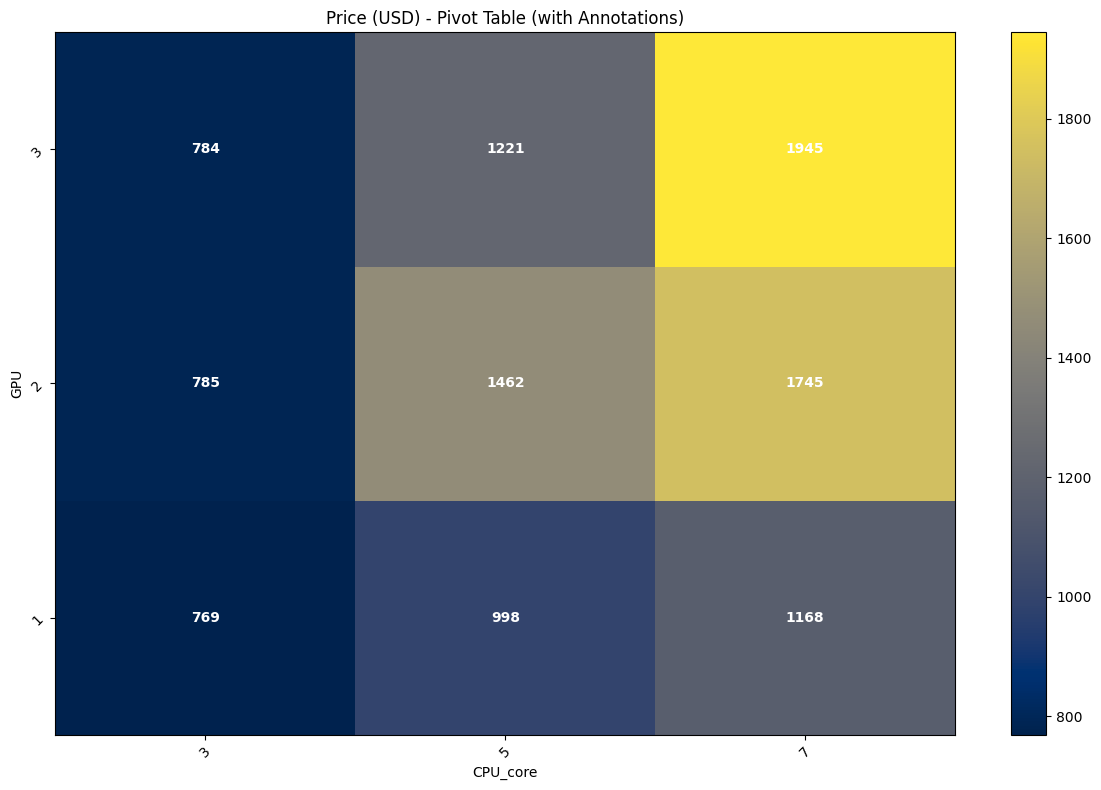

In [36]:
### DATA INSIGHTS LAB

# Import required libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

## Reading the data set and generating the statistical description
# PROMPT 1: Write a python code to perform the following actions.
# 1. Import a data set from a CSV file, The headers for the data set must be in the first row of the CSV file.
# 2. Generate the statistical description of all the features used in the data set. Include "object" data types as well.

def describe_data(csv_file):
    # Step 1: Import dataset using pandas read_csv
    df = pd.read_csv(csv_file)
    print(df.head())
    
    # Step 2: Retrieve column headers and data types
    columns = df.columns
    column_types = df.dtypes.astype(str).to_dict()
    
    # Step 3: Generate statistical description for numerical columns
    num_stats = df.describe().round(2)
    
    # Step 4: Handle 'object' (categorical) columns
    obj_stats = {}
    for col in df.select_dtypes(include=['object']).columns:
        obj_stats[col] = {
            'unique_values': df[col].nunique(),
            'top_value': df[col].value_counts().index[0],
            'top_count': df[col].value_counts().max()
        }
    
    # Step 5: Combine all statistical information
    stats_description = {
        "DataShape": {
            "Columns": columns,
            "Column Types": column_types
        },
        "Numerical Statistics": num_stats,
        "Categorical Statistics": obj_stats
    }
    
    return stats_description

# Apply describe_data function to the given URL
results = describe_data("dataset.csv")

print("Data Shape:")
print(results["DataShape"])

print("\nNumerical Statistics:")
print(results["Numerical Statistics"])

print("\nCategorical Statistics:")
for column, stats in results["Categorical Statistics"].items():
    print(f"Column: {column}")
    print(f"  Unique Values: {stats['unique_values']}")
    print(f"  Top Value: {stats['top_value']}")
    print(f"  Top Count: {stats['top_count']}")
    print()

## Creating parameter visualizations
# PROMPT 2: Write a Python code to perform the following actions.
# 1. Create regression plots for the attributes "CPU_frequency", "Screen_Size_cm" and "Weight_kg" against "Price".
# 2. Create box plots for the attributes "Category", "GPU", "OS", "CPU_core", "RAM_GB" and "Storage_GB_SSD" against the attribute "Price".

df = pd.read_csv("dataset.csv")
def plot_regression_boxplot(df, target_price_column):
    # List of features to plot
    features_to_plot = ["CPU_frequency", "Screen_Size_cm", "Weight_kg", 
                        "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]
    
    # Create a subplot grid
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
    
    # Flatten the axs array for easy handling
    axs = axs.flatten()
    
    # Plot regression lines
    for i, feature in enumerate(features_to_plot[:3]):
        ax = axs[i]
        sns.regplot(x=feature, y=target_price_column, data=df, ax=ax)
        ax.set_title(f'Regression: {feature} vs {target_price_column}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Price')
    
    # Plot box plots
    for i, feature in enumerate(features_to_plot[3:]):
        ax = axs[i + 3]
        sns.boxplot(x=target_price_column, y=feature, data=df, ax=ax)
        ax.set_title(f'Boxplot: {feature} vs {target_price_column}')
        ax.set_xlabel(target_price_column)
        ax.set_ylabel(feature)
    
    # Adjust layouts and show plot
    plt.tight_layout()
    plt.show()
    
# Apply plot_regression_boxplot function:
%matplotlib inline
plot_regression_boxplot(df, 'Price')

## Evaluate dependence
# PROMPT 3: Write a Python code for the following.
# 1. Evaluate the correlation value, pearson coefficient and p-values for all numerical attributes against the target attribute "Price".
# 2. Don't include the values evaluated for target variable against itself.
# 3. Print these values as a part of a single dataframe against each individual attribute.

# Assuming your dataframe has a target attribute 'Price'
df = pd.read_csv('dataset.csv')

# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)

# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')

# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []

for column in numerical_attributes.columns:
    if column != 'Price':
        # Drop rows with NaNs or infs in either column
        valid_data = df[[column, 'Price']].replace([np.inf, -np.inf], np.nan).dropna()

        if len(valid_data) > 1:  # Make sure enough data exists
            pearson_coefficient, p_value = pearsonr(valid_data[column], valid_data['Price'])
        else:
            pearson_coefficient, p_value = np.nan, np.nan  # Not enough data
        
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)

# Create a new dataframe to store the results
results_df = pd.DataFrame({
    'Attribute': correlation_values.index,
    'Correlation Value': correlation_values,
    'Pearson Coefficient': pearson_coefficients,
    'P-value': p_values
})

print(results_df)
 
## Grouping and Pivots
# PROMPT 4: Write a python code that performs the following actions.
# 1. Group the attributes "GPU", "CPU_core" and "Price", as available in a dataframe df
# 2. Create a pivot table for this group, assuming the target variable to be 'Price' and aggregation function as mean
# 3. Plot a pcolor plot for this pivot table.

def plot_pivot_table(df):
    import matplotlib.pyplot as plt

    # Step 1: Grouping and pivoting
    grouped = df.groupby(['GPU', 'CPU_core'])
    pivot_table = grouped['Price'].mean().unstack()
    print(pivot_table)

    # Step 2: Plotting
    plt.figure(figsize=(12, 8))
    pcolor_plot = plt.pcolor(pivot_table, cmap='cividis')  # or any other cmap you like
    plt.colorbar(pcolor_plot)

    # Add annotations
    for y in range(pivot_table.shape[0]):
        for x in range(pivot_table.shape[1]):
            value = pivot_table.iloc[y, x]
            if pd.notna(value):  # Don't try to annotate NaNs
                plt.text(x + 0.5, y + 0.5, f'{value:.0f}',  # rounded to 0 decimals
                         ha='center', va='center', color='white', fontsize=10, weight='bold')

    # Add labels and title
    plt.xticks(np.arange(0.5, len(pivot_table.columns), 1), pivot_table.columns, rotation=45)
    plt.yticks(np.arange(0.5, len(pivot_table.index), 1), pivot_table.index, rotation=45)
    plt.xlabel('CPU_core')
    plt.ylabel('GPU')
    plt.title('Price (USD) - Pivot Table (with Annotations)')

    plt.tight_layout()
    plt.show()

# Apply plot_pivot_table function
plot_pivot_table(df)